In [1]:
import torch
import models
import image_loader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
model = models.Autoencoder()
model.load_state_dict(torch.load('../trained-models/covid-autoencoder/20201029-125637'))

<All keys matched successfully>

In [3]:
val_img_folder, val_dataset = image_loader.get_image_dataset(root_dir='..\images', split='val', batch_size=1, num_workers=0)

['covid', 'non_covid']


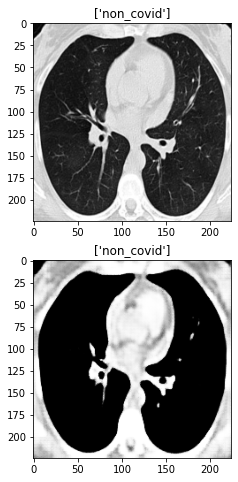

In [4]:

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp, cmap='gray')
    mean = np.array([0.63886562])
    std = np.array([0.27450625])
    inp = std * inp + mean
    plt.imshow(inp, cmap='gray')
    if title is not None:
        plt.title(title)
    #plt.pause(5)

class_names = val_img_folder.classes
# Get a batch of training data
inputs, classes = next(iter(val_dataset))
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(2, 1, 1)
out = inputs[0, :, :, :]
imshow(out, title=[class_names[x] for x in classes])

inputs = model(inputs).detach()

# # Make a grid from batch
# out = torchvision.utils.make_grid(inputs)
# print(out.shape)
fig.add_subplot(2, 1, 2)
out = inputs[0, :, :, :]
imshow(out, title=[class_names[x] for x in classes])

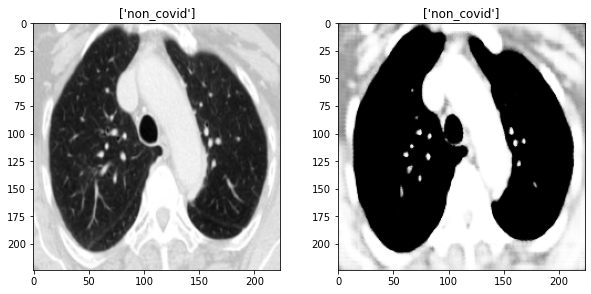

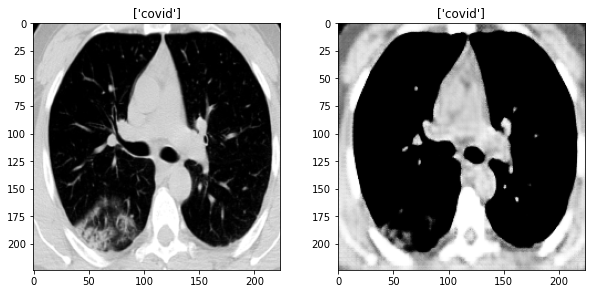

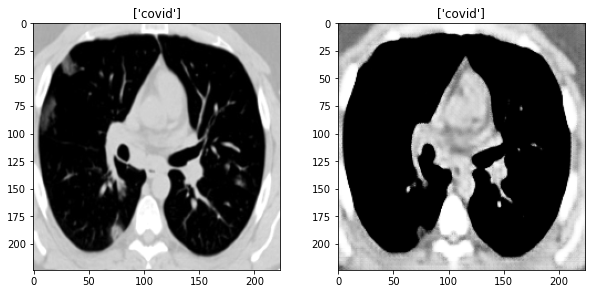

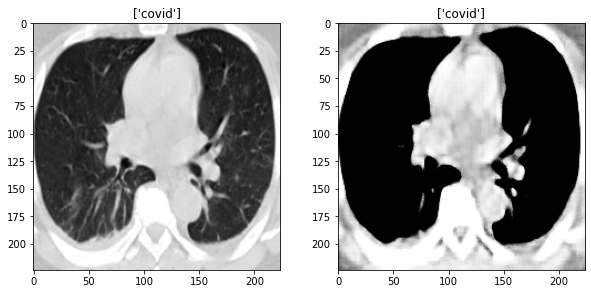

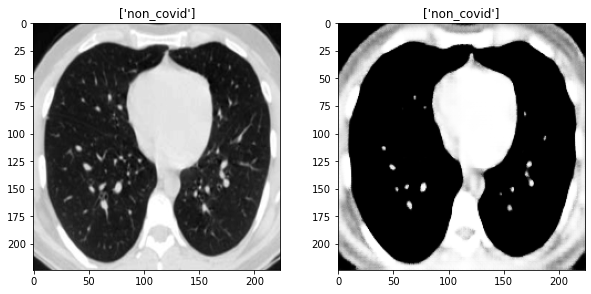

In [5]:

for i in range(5):
    fig=plt.figure(figsize=(20, 10))
    class_names = val_img_folder.classes
    # Get a batch of training data
    inputs, classes = next(iter(val_dataset))
    out = inputs[0, :, :, :]
    fig.add_subplot(2, 2,1)
    imshow(out, title=[class_names[x] for x in classes])

    inputs = model(inputs).detach()

    # # Make a grid from batch
    # out = torchvision.utils.make_grid(inputs)
    # print(out.shape)
    fig.add_subplot(2, 1, 1)
    out = inputs[0, :, :, :]
    imshow(out, title=[class_names[x] for x in classes])

In [14]:
import data_transforms
from torchvision import datasets, models, transforms
mean, std = [0.63886562], [0.27450625]
transforms = data_transforms.get_train_transforms((224, 224), mean, std)
img_folder = datasets.ImageFolder(os.path.join('../', 'sample_images'), transforms)
print(img_folder.classes)

dataset = torch.utils.data.DataLoader(img_folder, batch_size=1, shuffle=False, num_workers=0)
non_transformed_dataset = torch.utils.data.DataLoader(datasets.ImageFolder(os.path.join('../', 'sample_images'), data_transforms.get_no_transforms()), batch_size=1, shuffle=False, num_workers=0)

['COVIDNegative', 'COVIDPositive']


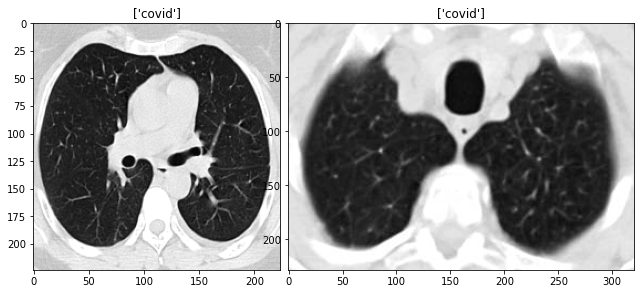

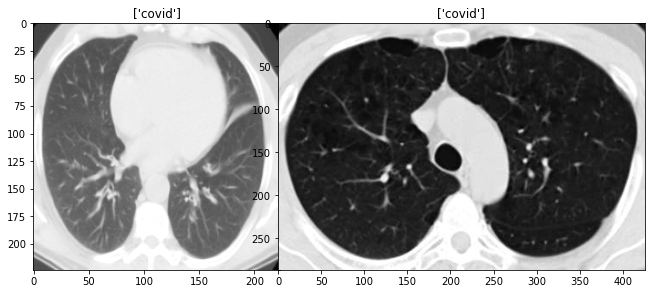

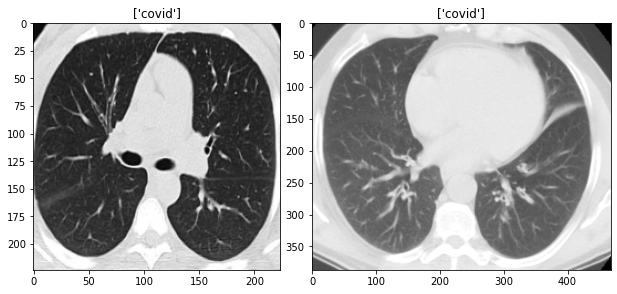

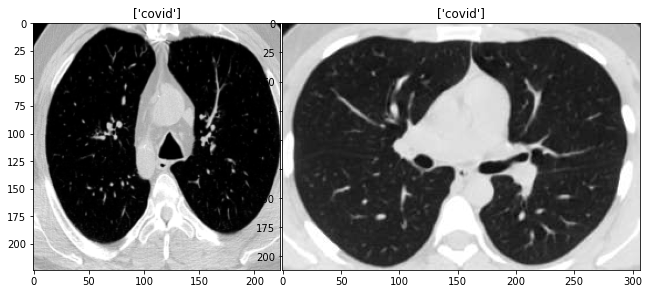

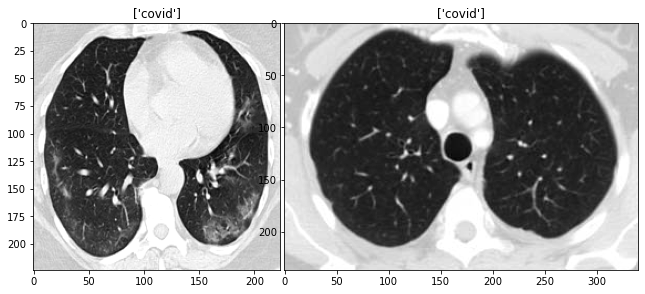

In [15]:
class_names = val_img_folder.classes
# Get a batch of training data
dataset = iter(dataset)
non_transformed_dataset = iter(non_transformed_dataset)

for i in range(5):
    inputs, classes = next(dataset)
    nt_inputs, classes = next(non_transformed_dataset)
    fig=plt.figure(figsize=(20, 10))
    out = inputs[0, :, :, :]
    fig.add_subplot(2, 2,1)
    imshow(out, title=[class_names[x] for x in classes])

    
    fig.add_subplot(2, 1, 1)
    out = nt_inputs[0, :, :, :]
    imshow(out, title=[class_names[x] for x in classes])